In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from time import sleep
from selenium import webdriver  
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.support.ui import Select  
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException 
import re
import sys
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_actividades_asturias = pd.read_csv('../Datos/Actividades_Asturias.csv')
df_actividades_malaga = pd.read_csv('../Datos/Actividades_malaga.csv')
df_vuelos_asturias = pd.read_csv('../Datos/vuelos_Asturias.csv')
df_vuelos_malaga = pd.read_csv('../Datos/vuelos_malaga.csv')
df_motos_malaga = pd.read_csv('../Datos/vehiculos_malaga.csv')
df_hoteles_asturias = pd.read_csv('../Datos/tripadvaisor_Asturias.csv')
df_hoteles_malaga = pd.read_csv('../Datos/tripadvaisor_malaga.csv')

In [20]:
df_actividades_asturias.head(2)
df_ac_concat= df_actividades_asturias.drop(['Unnamed: 0.1', 'Unnamed: 0','Descripción'], axis=1)
df_ac_concat.head()

,Actividad,Precio,Ciudad
0,"Excursión a Covadonga, Cangas de Onís y la cos...",35.0,asturias
1,"Excursión a Avilés, Cudillero y Luarca",35.0,asturias
2,Free tour por Oviedo,0.0,asturias
3,Free tour por Gijón,0.0,asturias
4,"Excursión a Llanes, Ribadesella y San Vicente ...",35.0,asturias


In [23]:
df_actividades_malaga.head(2)
df_acm_concat= df_actividades_malaga.drop(['Unnamed: 0.1', 'Unnamed: 0','Descripción','Unnamed: 0.2','Unnamed: 0.3'], axis=1)
df_acm_concat.head()

,Actividad,Precio,Ciudad
0,Excursión al Caminito del Rey,59.0,malaga
1,Free tour por Málaga,0.0,malaga
2,Tour de Málaga al completo con entradas,36.0,malaga
3,Excursión a Ronda y Setenil,33.0,malaga
4,Visita guiada por la alcazaba y el teatro romano,15.0,malaga


In [25]:
df_vuelos_asturias.head(2)

,Unnamed: 0,ciudad_origen,ciudad_destino,duracion(min),aerolinea,precio,fecha_salida,hora_salida,fecha_llegada,hora_llegada
0,0,Madrid,Santiago del Monte,75,Iberia,610.93,2024-11-01,2024-10-20 16:40:00,2024-11-01,2024-10-20 17:55:00
1,1,Santiago del Monte,Madrid,75,Iberia,610.93,2024-11-03,2024-10-20 17:40:00,2024-11-03,2024-10-20 18:55:00


In [42]:
df_vuelos_asturias.head(2)
df_vueloa_concat = df_vuelos_asturias.drop(
    ['Unnamed: 0', 'duracion(min)', 'fecha_salida', 'hora_salida', 'ciudad_destino', 'fecha_llegada', 'hora_llegada'],
    axis=1)
df_vueloa_concat.head
df_vueloa_concat['ciudad_origen'] = df_vueloa_concat['ciudad_origen'].replace('Santiago del Monte', 'Asturias')

In [43]:
df_vueloa_concat.head()


,ciudad_origen,aerolinea,precio
0,Madrid,Iberia,610.93
1,Asturias,Iberia,610.93
2,Madrid,Iberia,610.93
3,Asturias,Iberia,610.93
4,Madrid,Iberia,610.93


In [45]:
df_vuelos_malaga.head(2)
df_vuelom_concat = df_vuelos_asturias.drop(
    ['Unnamed: 0', 'duracion(min)', 'fecha_salida', 'hora_salida', 'ciudad_destino', 'fecha_llegada', 'hora_llegada'],
    axis=1)
df_vueloa_concat.head(2)

,ciudad_origen,aerolinea,precio
0,Madrid,Iberia,610.93
1,Asturias,Iberia,610.93


In [53]:
df_motos_malaga.head(2)
df_moto_concat = df_motos_malaga.drop(
    ['Unnamed: 0','Dias por precio'],
    axis=1)

df_moto_concat
df_moto_concat = df_moto_concat[df_moto_concat['Lugares'] != 'Granada']
df_moto_concat = df_moto_concat[df_moto_concat['Lugares'] != 'Sevilla']
df_moto_concat.head(2)


,Modelo,Lugares,Precio
1,Suzuki Burgman,Málaga,39.0
2,Honda CB 500 X,Málaga,43.0


In [57]:
df_hoteles_asturias.head(2)


,Unnamed: 0,Nombre Hotel,Talla,Puntuacion media,Detalles extra,Precio,Proveedor,URL,Ciudad
0,0,Hotel Exe Oviedo Centro,Nan,4.0,Nan,131.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias
1,1,1. Barceló Oviedo Cervantes,SMALL,4.5,Nan,168.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias


In [61]:
dfhotelesa_concat = df_hoteles_asturias.drop(
    ['Unnamed: 0', 'Talla', 'Puntuacion media', 'Detalles extra', 'Proveedor', 'URL'],
    axis=1)
dfhotelesa_concat.head(2)


,Nombre Hotel,Precio,Ciudad
0,Hotel Exe Oviedo Centro,131.0,Asturias
1,1. Barceló Oviedo Cervantes,168.0,Asturias


In [62]:
df_hoteles_malaga.head(2)
dfhotelesm_concat = df_hoteles_malaga.drop(
    ['Unnamed: 0', 'Talla', 'Puntuacion media', 'Detalles extra', 'Proveedor', 'URL'],
    axis=1)
dfhotelesm_concat.head(2)

,Nombre Hotel,Precio,Ciudad
0,Saenz Suites Gallery By Bossh Apartments,158.0,Malaga
1,1. Vincci Larios Diez,338.0,Malaga


In [64]:
df_total = pd.concat([
    df_ac_concat,
    df_acm_concat,
    df_vueloa_concat,
    df_vuelom_concat,
    df_moto_concat,
    dfhotelesa_concat,
    dfhotelesm_concat
], ignore_index=True, sort=False)


df_total.fillna('Nan', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2100\2037768015.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Nan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_total.fillna('Nan', inplace=True)


In [78]:
df_total.head()

,Actividad,Precio,Ciudad,ciudad_origen,aerolinea,precio,Modelo,Lugares,Nombre Hotel
0,"Excursión a Covadonga, Cangas de Onís y la cos...",35.0,asturias,Nan,Nan,Nan,Nan,Nan,Nan
1,"Excursión a Avilés, Cudillero y Luarca",35.0,asturias,Nan,Nan,Nan,Nan,Nan,Nan
2,Free tour por Oviedo,0.0,asturias,Nan,Nan,Nan,Nan,Nan,Nan
3,Free tour por Gijón,0.0,asturias,Nan,Nan,Nan,Nan,Nan,Nan
4,"Excursión a Llanes, Ribadesella y San Vicente ...",35.0,asturias,Nan,Nan,Nan,Nan,Nan,Nan


In [89]:
min_ac_asturias = df_ac_concat['Precio'].min()
max_ac_asturias = df_ac_concat['Precio'].max()

min_vuelom_asturias = df_vueloa_concat['precio'].min()
max_vuelom_asturias = df_vueloa_concat['precio'].max()

min_hoteles_asturias = dfhotelesa_concat['Precio'].min()
max_hoteles_asturias = dfhotelesa_concat['Precio'].max()

# Sumar mínimos y máximos para Asturias
suma_minimos_asturias = min_ac_asturias + min_vuelom_asturias + min_hoteles_asturias
suma_maximos_asturias = max_ac_asturias + max_vuelom_asturias + max_hoteles_asturias

# Calcular mínimos y máximos para Málaga
min_ac_malaga = df_acm_concat['Precio'].min()
max_ac_malaga = df_acm_concat['Precio'].max()

min_vuelom_malaga = df_vuelom_concat['precio'].min()
max_vuelom_malaga = df_vuelom_concat['precio'].max()

min_moto_malaga = df_moto_concat['Precio'].min()
max_moto_malaga = df_moto_concat['Precio'].max()

min_hoteles_malaga = dfhotelesm_concat['Precio'].min()
max_hoteles_malaga = dfhotelesm_concat['Precio'].max()

# Sumar mínimos y máximos para Málaga
suma_minimos_malaga = min_ac_malaga + min_vuelom_malaga + min_moto_malaga + min_hoteles_malaga
suma_maximos_malaga = max_ac_malaga + max_vuelom_malaga + max_moto_malaga + max_hoteles_malaga

# Mostrar resultados
print(f"El viaje total completo a asturias con actividades hoteles y vuelos minimos es de : {round(suma_minimos_asturias)} euros")
print(f"El viaje total completo a asturias con actividades hoteles y vuelos maximos es de : {round(suma_maximos_asturias)} euros")
print(f"El viaje total completo a malaga con actividades hoteles y vuelos minimos es de {round(suma_minimos_malaga)} euros")
print(f"El viaje total completo a malaga con actividades hoteles y vuelos maximos es de {round(suma_maximos_malaga)} euros")

El viaje total completo a asturias con actividades hoteles y vuelos minimos es de : 679 euros
El viaje total completo a asturias con actividades hoteles y vuelos maximos es de : 1026 euros
El viaje total completo a malaga con actividades hoteles y vuelos minimos es de 693 euros
El viaje total completo a malaga con actividades hoteles y vuelos maximos es de 1402 euros


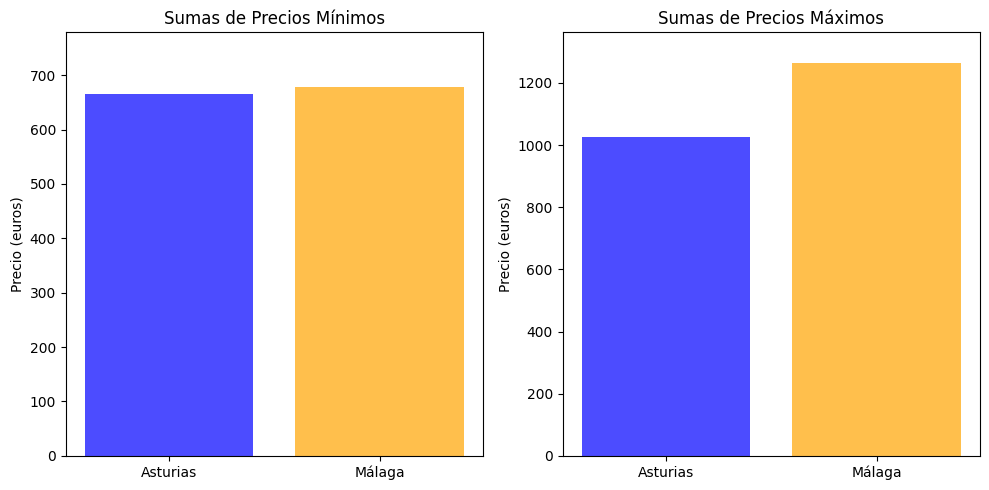

In [108]:
import matplotlib.pyplot as plt


labels = ['Asturias', 'Málaga']
suma_minimos = [suma_minimos_malaga, suma_minimos_asturias]  # Invertir solo los mínimos
suma_maximos = [suma_maximos_asturias, suma_maximos_malaga]


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels, suma_minimos, color=['blue', 'orange'], alpha=0.7)
axs[0].set_title('Sumas de Precios Mínimos')
axs[0].set_ylabel('Precio (euros)')
axs[0].set_ylim(0, max(suma_minimos) + 100)


axs[1].bar(labels, suma_maximos, color=['blue', 'orange'], alpha=0.7)
axs[1].set_title('Sumas de Precios Máximos')
axs[1].set_ylabel('Precio (euros)')
axs[1].set_ylim(0, max(suma_maximos) + 100)


plt.tight_layout()
plt.show()

Observamos que si los clientes quieren un viaje con los precios minimos no hay a penas diferencia entre los lugares, pero si los clientes quiere una experiencia un poco mas de alto disfrute la diferencia es notable.

In [92]:
#sin motos en malaga

suma_maximos_malaga_sin_moto = max_ac_malaga + max_vuelom_malaga + max_hoteles_malaga
suma_minimos_malaga_sin_moto = min_ac_malaga + min_vuelom_malaga  + min_hoteles_malaga
print(f"El viaje total completo a malaga con actividades hoteles y vuelos minimos es de {round(suma_minimos_malaga)} euros, en este caso quitamos la opcion de alquiler de motos")
print(f"El viaje total completo a malaga con actividades hoteles y vuelos maximos es de {round(suma_maximos_malaga)} en este caso quitamos la opcion de alquiler de motos")

El viaje total completo a malaga con actividades hoteles y vuelos minimos es de 666 euros, en este caso quitamos la opcion de alquiler de motos
El viaje total completo a malaga con actividades hoteles y vuelos maximos es de 1263 en este caso quitamos la opcion de alquiler de motos


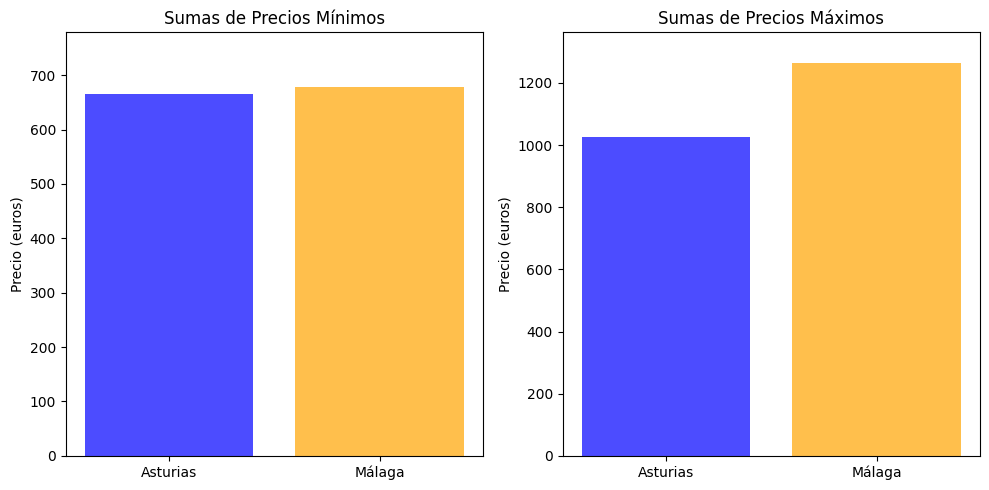

In [110]:
labels = ['Asturias', 'Málaga']
suma_minimos = [suma_minimos_malaga_sin_moto, suma_minimos_asturias]  # Invertir solo los mínimos
suma_maximos = [suma_maximos_asturias, suma_maximos_malaga_sin_moto]


fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].bar(labels, suma_minimos, color=['blue', 'orange'], alpha=0.7)
axs[0].set_title('Sumas de Precios Mínimos')
axs[0].set_ylabel('Precio (euros)')
axs[0].set_ylim(0, max(suma_minimos) + 100)

axs[1].bar(labels, suma_maximos, color=['blue', 'orange'], alpha=0.7)
axs[1].set_title('Sumas de Precios Máximos')
axs[1].set_ylabel('Precio (euros)')
axs[1].set_ylim(0, max(suma_maximos) + 100)

plt.tight_layout()
plt.show()

Observamos que incluso si quitamos la experiencia de malaga en moto no cambia la experiencia para el cliente en comparacion con las dos ciudades


In [93]:
media_ac_asturias = df_ac_concat['Precio'].mean()
moda_ac_asturias = df_ac_concat['Precio'].mode()[0]  # Obtiene la primera moda

media_vuelom_asturias = df_vueloa_concat['precio'].mean()
moda_vuelom_asturias = df_vueloa_concat['precio'].mode()[0]  # Obtiene la primera moda

media_hoteles_asturias = dfhotelesa_concat['Precio'].mean()
moda_hoteles_asturias = dfhotelesa_concat['Precio'].mode()[0]  # Obtiene la primera moda

# Sumar precios medios y la moda para Asturias
suma_media_asturias = media_ac_asturias + media_vuelom_asturias + media_hoteles_asturias
suma_moda_asturias = moda_ac_asturias + moda_vuelom_asturias + moda_hoteles_asturias

# Calcular precios medios y la moda para Málaga
media_ac_malaga = df_acm_concat['Precio'].mean()
moda_ac_malaga = df_acm_concat['Precio'].mode()[0]  # Obtiene la primera moda

media_vuelom_malaga = df_vuelom_concat['precio'].mean()
moda_vuelom_malaga = df_vuelom_concat['precio'].mode()[0]  # Obtiene la primera moda

media_moto_malaga = df_moto_concat['Precio'].mean()
moda_moto_malaga = df_moto_concat['Precio'].mode()[0]  # Obtiene la primera moda

media_hoteles_malaga = dfhotelesm_concat['Precio'].mean()
moda_hoteles_malaga = dfhotelesm_concat['Precio'].mode()[0]  # Obtiene la primera moda

# Sumar precios medios y la moda para Málaga
suma_media_malaga = media_ac_malaga + media_vuelom_malaga + media_moto_malaga + media_hoteles_malaga
suma_moda_malaga = moda_ac_malaga + moda_vuelom_malaga + moda_moto_malaga + moda_hoteles_malaga

print(f"El viaje total completo a Asturias con actividades, hoteles y vuelos (precio medio) es de: {round(suma_media_asturias)} euros")
print(f"El viaje total completo a Asturias con actividades, hoteles y vuelos (moda) es de: {round(suma_moda_asturias)} euros")
print(f"El viaje total completo a Málaga con actividades, hoteles y vuelos y moto (precio medio) es de: {round(suma_media_malaga)} euros")
print(f"El viaje total completo a Málaga con actividades, hoteles y vuelos y moto (moda) es de: {round(suma_moda_malaga)} euros")

El viaje total completo a Asturias con actividades, hoteles y vuelos (precio medio) es de: 770 euros
El viaje total completo a Asturias con actividades, hoteles y vuelos (moda) es de: 742 euros
El viaje total completo a Málaga con actividades, hoteles y vuelos y moto (precio medio) es de: 931 euros
El viaje total completo a Málaga con actividades, hoteles y vuelos y moto (moda) es de: 950 euros


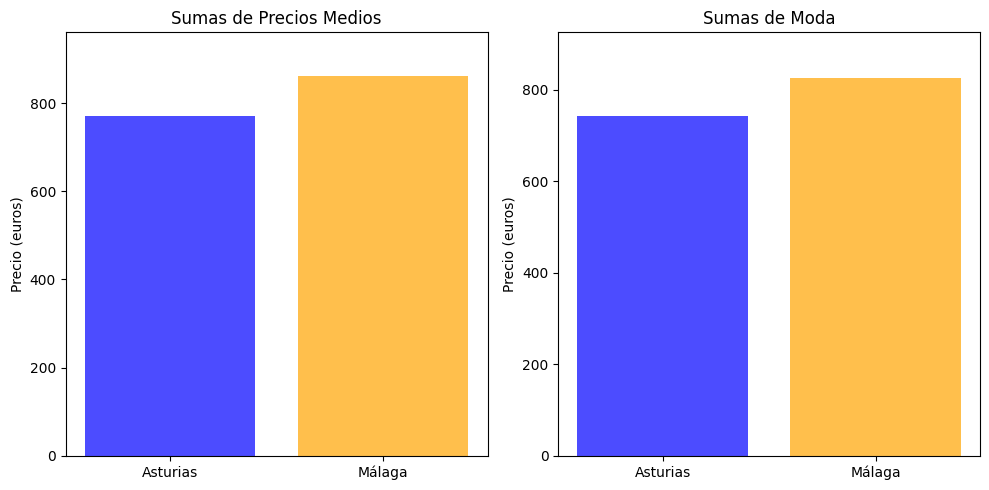

In [100]:
labels = ['Asturias', 'Málaga']
sumas_media = [suma_media_asturias, suma_media_malaga]
sumas_moda = [suma_moda_asturias, suma_moda_malaga]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels, sumas_media, color=['blue', 'orange'], alpha=0.7)
axs[0].set_title('Sumas de Precios Medios')
axs[0].set_ylabel('Precio (euros)')
axs[0].set_ylim(0, max(sumas_media) + 100)

axs[1].bar(labels, sumas_moda, color=['blue', 'orange'], alpha=0.7)
axs[1].set_title('Sumas de Moda')
axs[1].set_ylabel('Precio (euros)')
axs[1].set_ylim(0, max(sumas_moda) + 100)

plt.tight_layout()
plt.show()


Si el cliente quiere una experiencia media vemos que malaga es mas caro respecto  asturias.
Al igual que si el cliente quiere algo mas comun tambien seria mas caro malaga.

Viendo las medias y las modas vemos que las media son representativas aunque la recopilacion de datos es pequeña en este caso

In [111]:
#Sin motos
suma_media_malaga_sin = media_ac_malaga + media_vuelom_malaga  + media_hoteles_malaga
suma_moda_malaga_sin= moda_ac_malaga + moda_vuelom_malaga  + moda_hoteles_malaga
print(f"El viaje total completo a Málaga con actividades, hoteles y vuelos sin moto (precio medio) es de: {round(suma_media_malaga)} euros")
print(f"El viaje total completo a Málaga con actividades, hoteles y vuelos sin moto (moda) es de: {round(suma_moda_malaga)} euros")

El viaje total completo a Málaga con actividades, hoteles y vuelos sin moto (precio medio) es de: 861 euros
El viaje total completo a Málaga con actividades, hoteles y vuelos sin moto (moda) es de: 825 euros


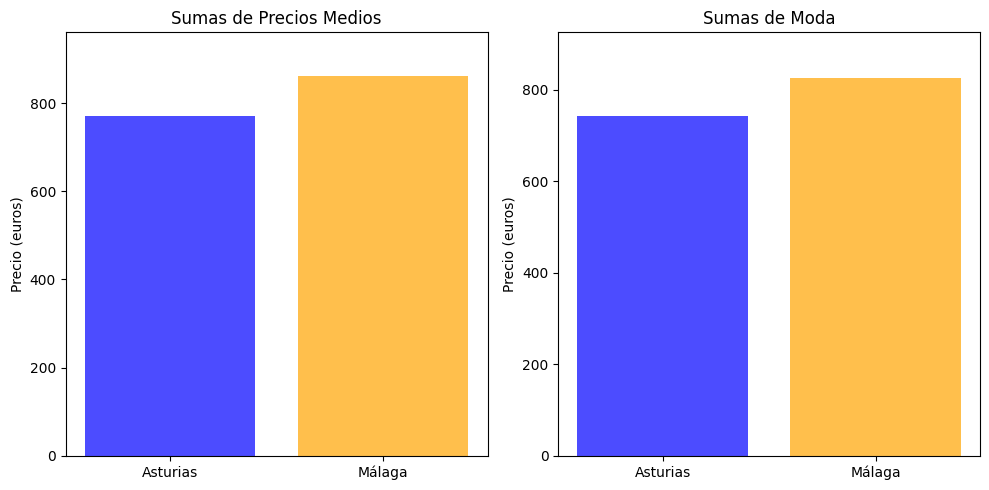

In [112]:
labels = ['Asturias', 'Málaga']
sumas_media = [suma_media_asturias, suma_media_malaga_sin]
sumas_moda = [suma_moda_asturias, suma_moda_malaga_sin]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(labels, sumas_media, color=['blue', 'orange'], alpha=0.7)
axs[0].set_title('Sumas de Precios Medios')
axs[0].set_ylabel('Precio (euros)')
axs[0].set_ylim(0, max(sumas_media) + 100)

axs[1].bar(labels, sumas_moda, color=['blue', 'orange'], alpha=0.7)
axs[1].set_title('Sumas de Moda')
axs[1].set_ylabel('Precio (euros)')
axs[1].set_ylim(0, max(sumas_moda) + 100)

plt.tight_layout()
plt.show()


Vemos que añadir la moto al paquete no es significativo puesto que sigue teniendo un numero parecido entre las dos ciudades.